In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
df = pd.read_csv("C:/Users/jay30/OneDrive/Desktop/Scaler/data/aerofit.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.shape

(180, 9)

In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [10]:
df['Age'].value_counts()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [13]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [14]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [16]:
df['Income'].value_counts().max()

14

In [17]:
df['Income'].value_counts().min()

1

In [23]:
df['Income'].max()

104581

In [27]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [26]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Univariate Analysis

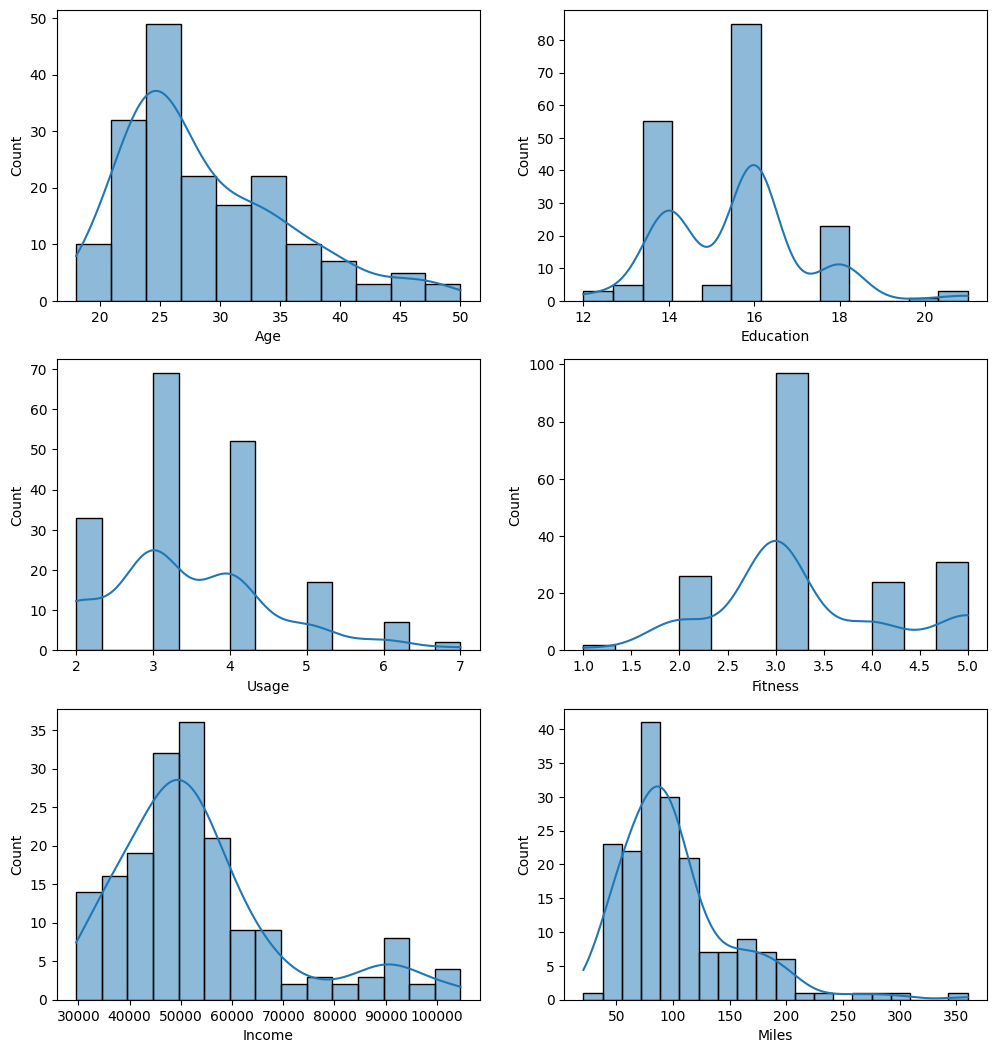

In [44]:
#Understanding the distribution of the data for the quantitative attributes:

fig,axis = plt.subplots(nrows=3 , ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.1)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

#### Outlier Detection using Boxplot

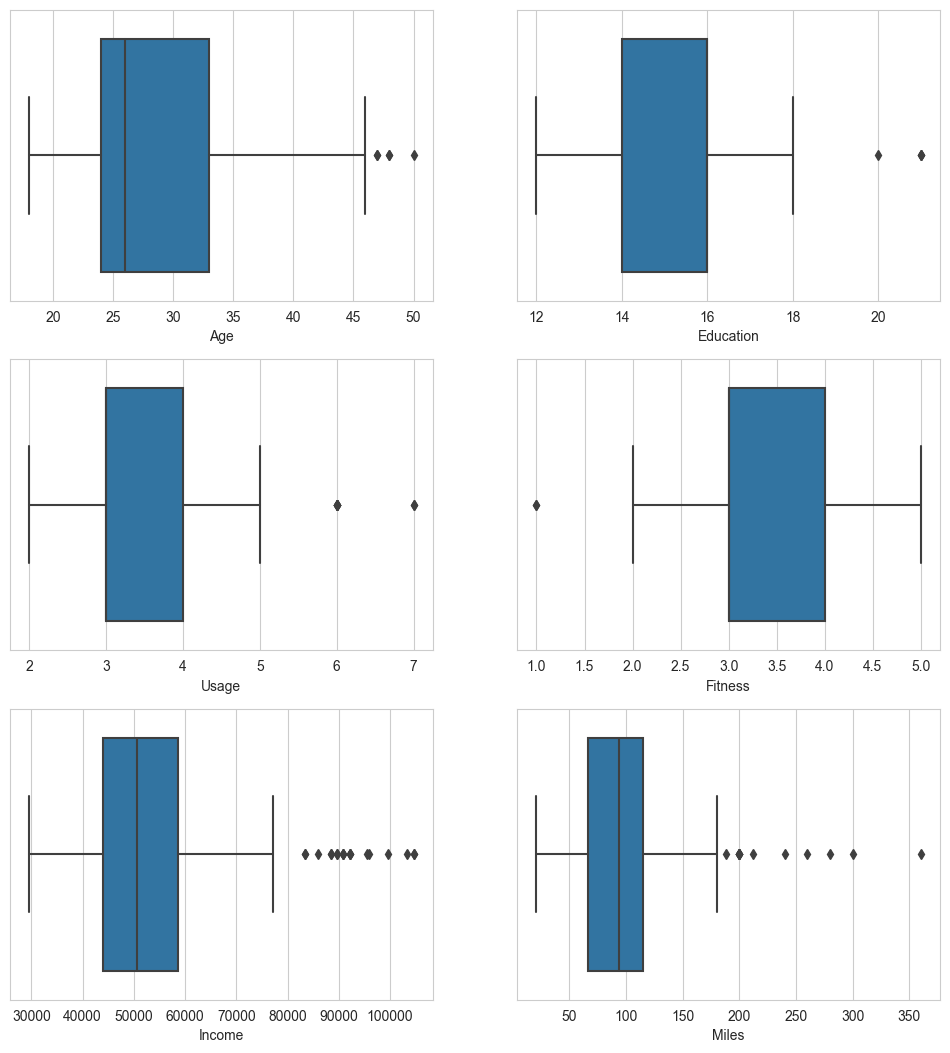

In [120]:
fig,axis= plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.1)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

#### Observation:

Even from box-plot its quite clear that:

1.Age, Education and Usage are having very few outliers.

2.While Income and Miles are having more outliers.

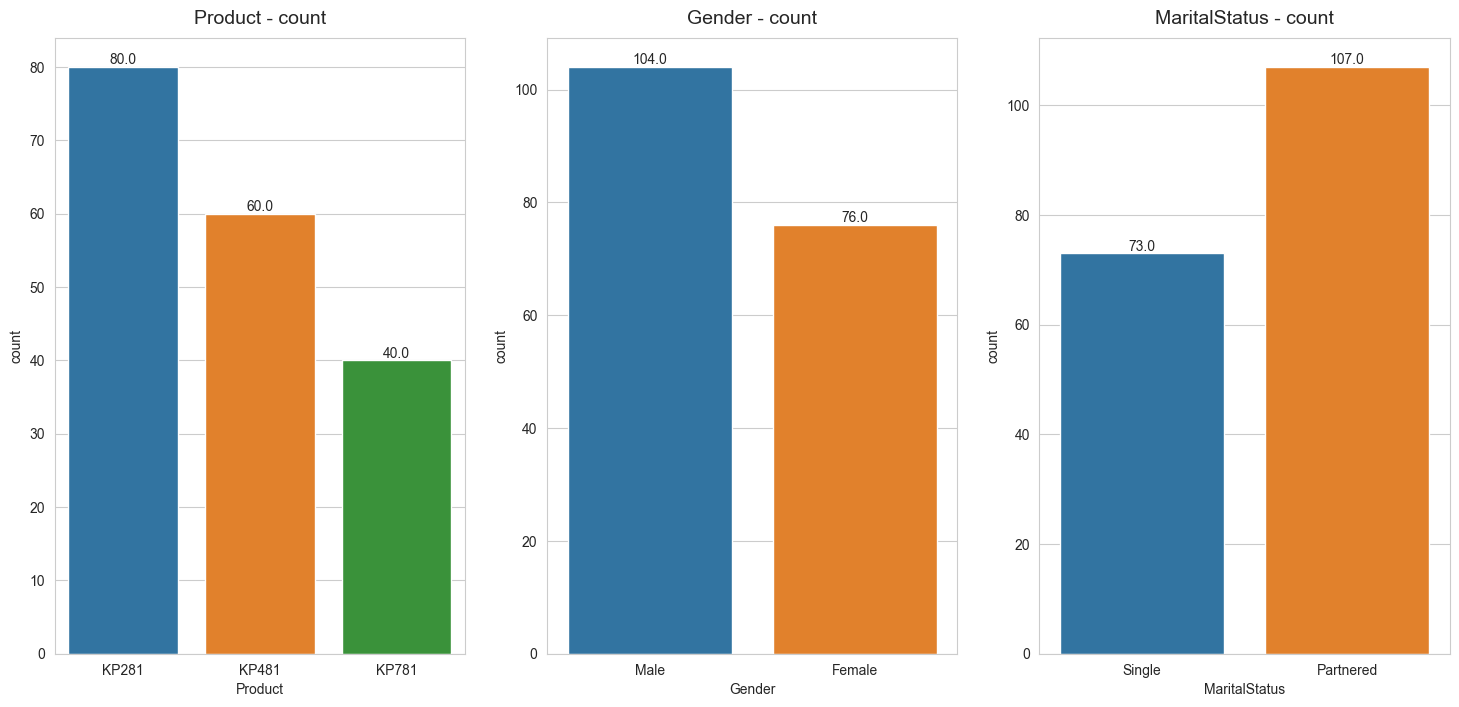

In [121]:
fig,axis= plt.subplots(nrows=1, ncols=3, figsize=(18,8)) 

sns.countplot(data=df, x="Product", ax=axis[0])
sns.countplot(data=df, x="Gender", ax=axis[1])
sns.countplot(data=df, x="MaritalStatus", ax=axis[2])

axis[0].set_title('Product - count', pad=10, fontsize=14)
axis[1].set_title('Gender - count', pad=10, fontsize=14)
axis[2].set_title('MaritalStatus - count', pad=10, fontsize=14)

def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',  # The text to display on the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                    ha='center', va='center',  # Alignment of the text
                    xytext=(0, 5),  # Offset of the text from the bar
                    textcoords='offset points',
                    fontsize=10)  # Optional: Adjust the font size for the labels

# Call the function for each subplot
add_count_labels(axis[0])
add_count_labels(axis[1])
add_count_labels(axis[2])
plt.show()

#### Observation:

1.KP281 is the most frequent product.

2.Thare are more Males in the data than Females.

3.More Partnered persons are there in the data.

To be precise - normalized count for each variable is shown below

In [10]:
df1= df[['Product', 'Gender', 'MaritalStatus']].melt()
round(df1.groupby(['variable', 'value']) [['value']].count() / len(df)*100,2)

value
variable      value           
Gender        Female     42.22
              Male       57.78
MaritalStatus Partnered  59.44
              Single     40.56
Product       KP281      44.44
              KP481      33.33
              KP781      22.22

#### Observations:

###### 1) Gender     
		a=> 57.78% of the customers are Male.

##### 2) MaritalStatus
	a=> 59.44% of the customers are Partnered.

##### 3) Product
    a=> 44.44% of the customers have purchased KP2821 product.
    b=> 33.33% of the customers have purchased KP481 product.
    c=> 22.22% of the customers have purchased KP781 product.

# Bivariate Analysis

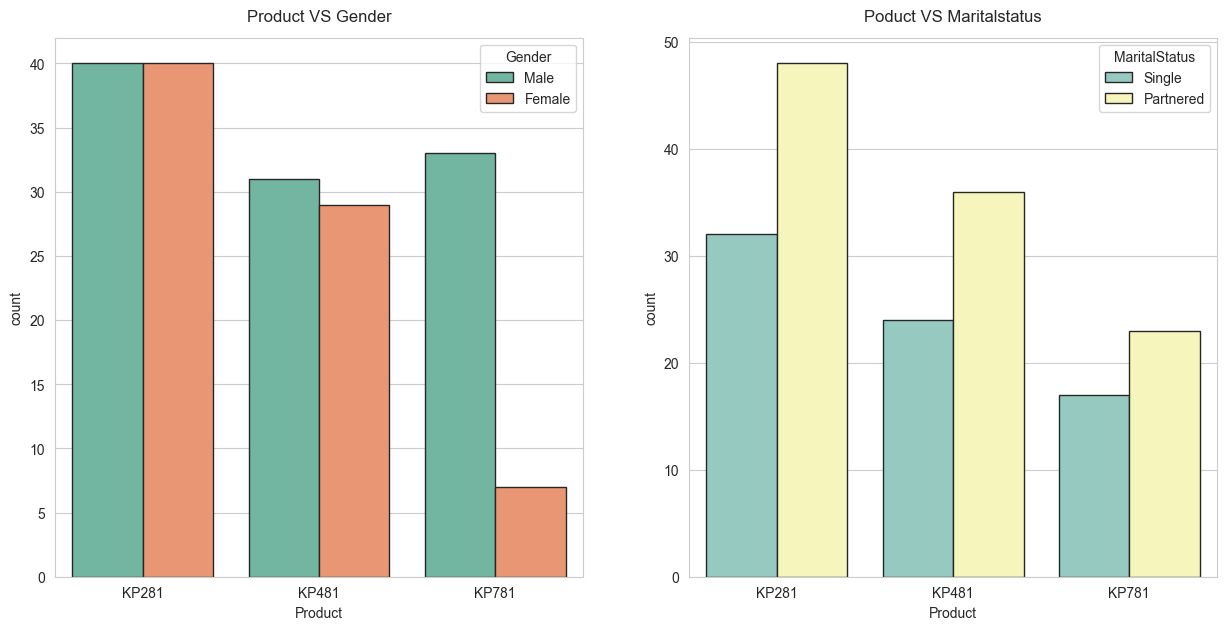

In [58]:
#Checking if features - Gender or MaritalStatus have any effect on the product purchased.

sns.set_style(style='whitegrid')
fig,axis=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axis[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette="Set3", ax=axis[1])

axis[0].set_title("Product VS Gender", pad=12, fontsize=12)
axis[1].set_title("Poduct VS Maritalstatus", pad=12, fontsize=12)
plt.show()

#### Observations:

###### 1) Product vs Gender
	a=> equal number of males and females have purchased KP281 product and Almost same for the product KP481
	b=> Most of the Male customers have purchased the KP781 product.

###### 2)Product vs MaritalStatus
	a=> Customer who is Partnered, is more likely to purchase the product.

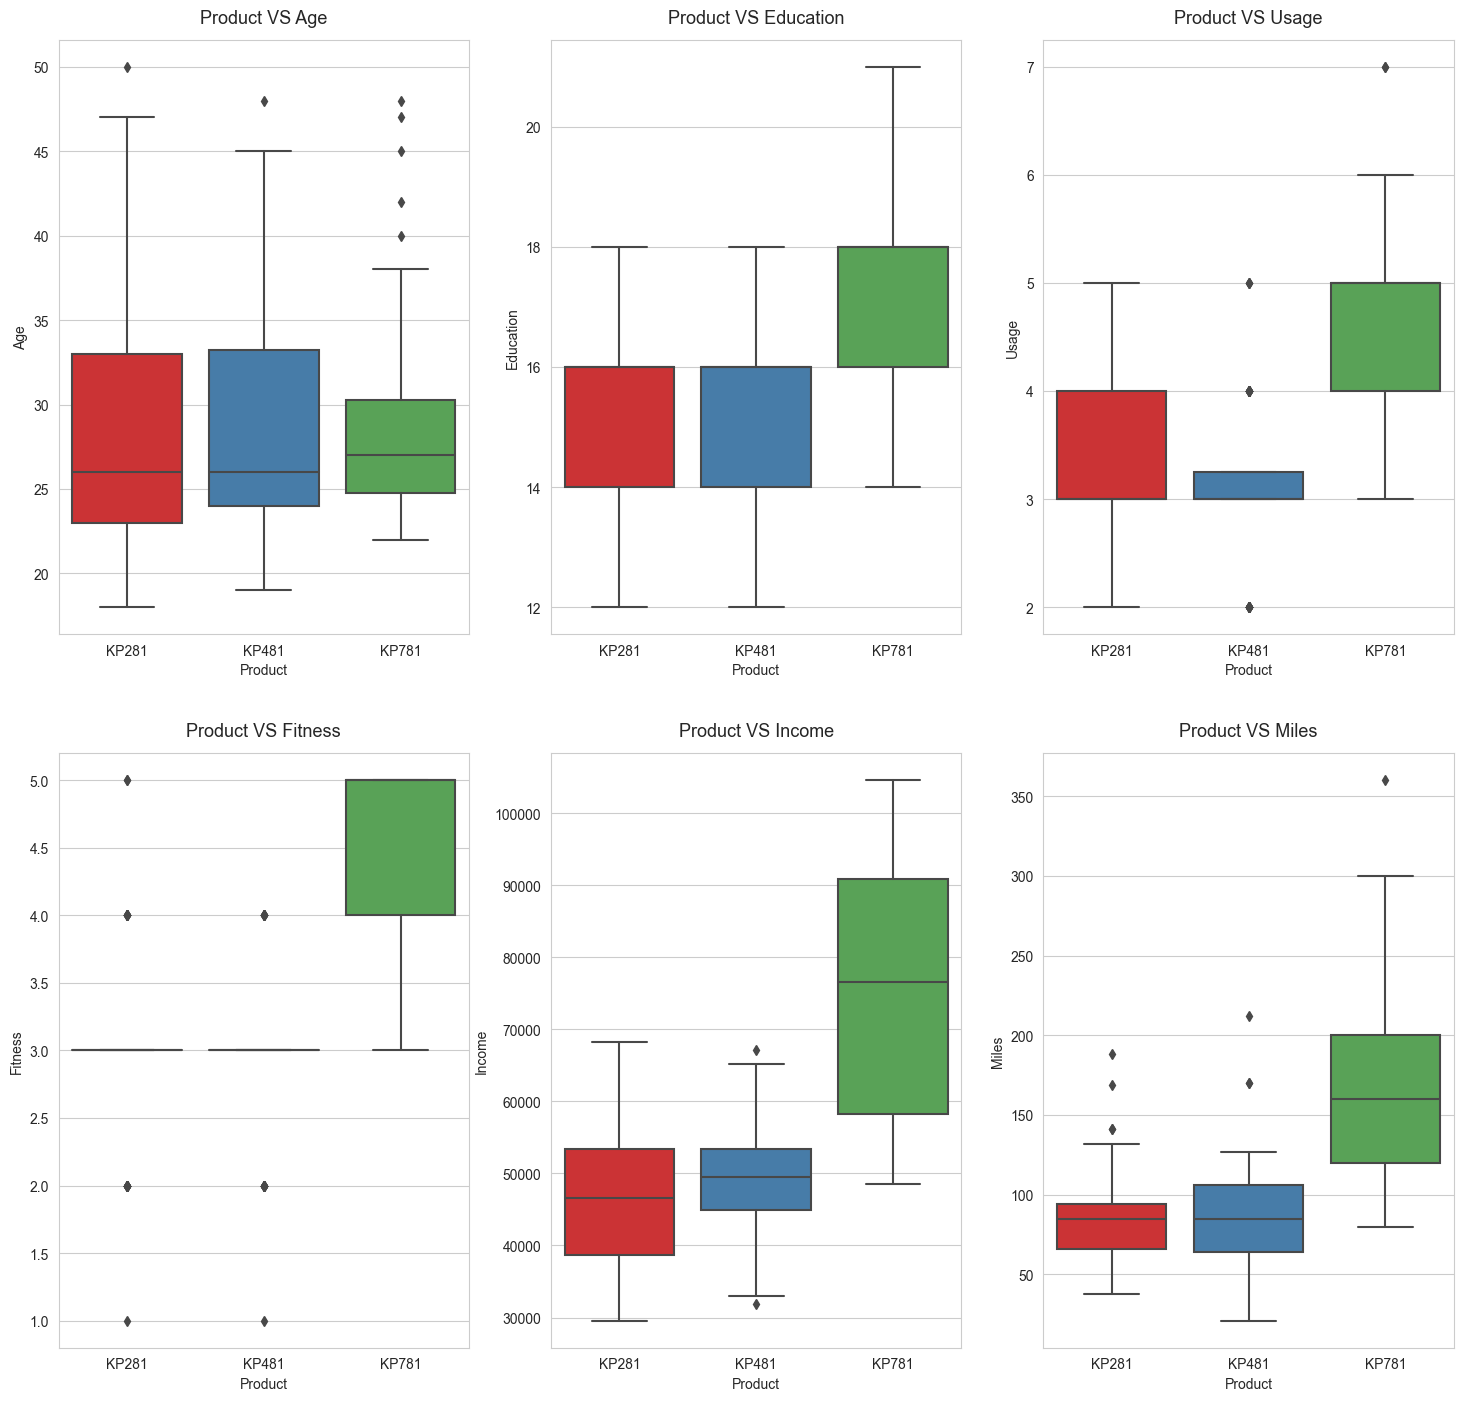

In [64]:
#Checking if following features have any effect on the product purchased:

colmn=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig,axis=plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.subplots_adjust(top=1.2)
count=0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=colmn[count], ax=axis[i,j], palette='Set1')
        axis[i,j].set_title(f"Product VS {colmn[count]}", pad=12, fontsize=13)
        count += 1

# Multivariate Analysis

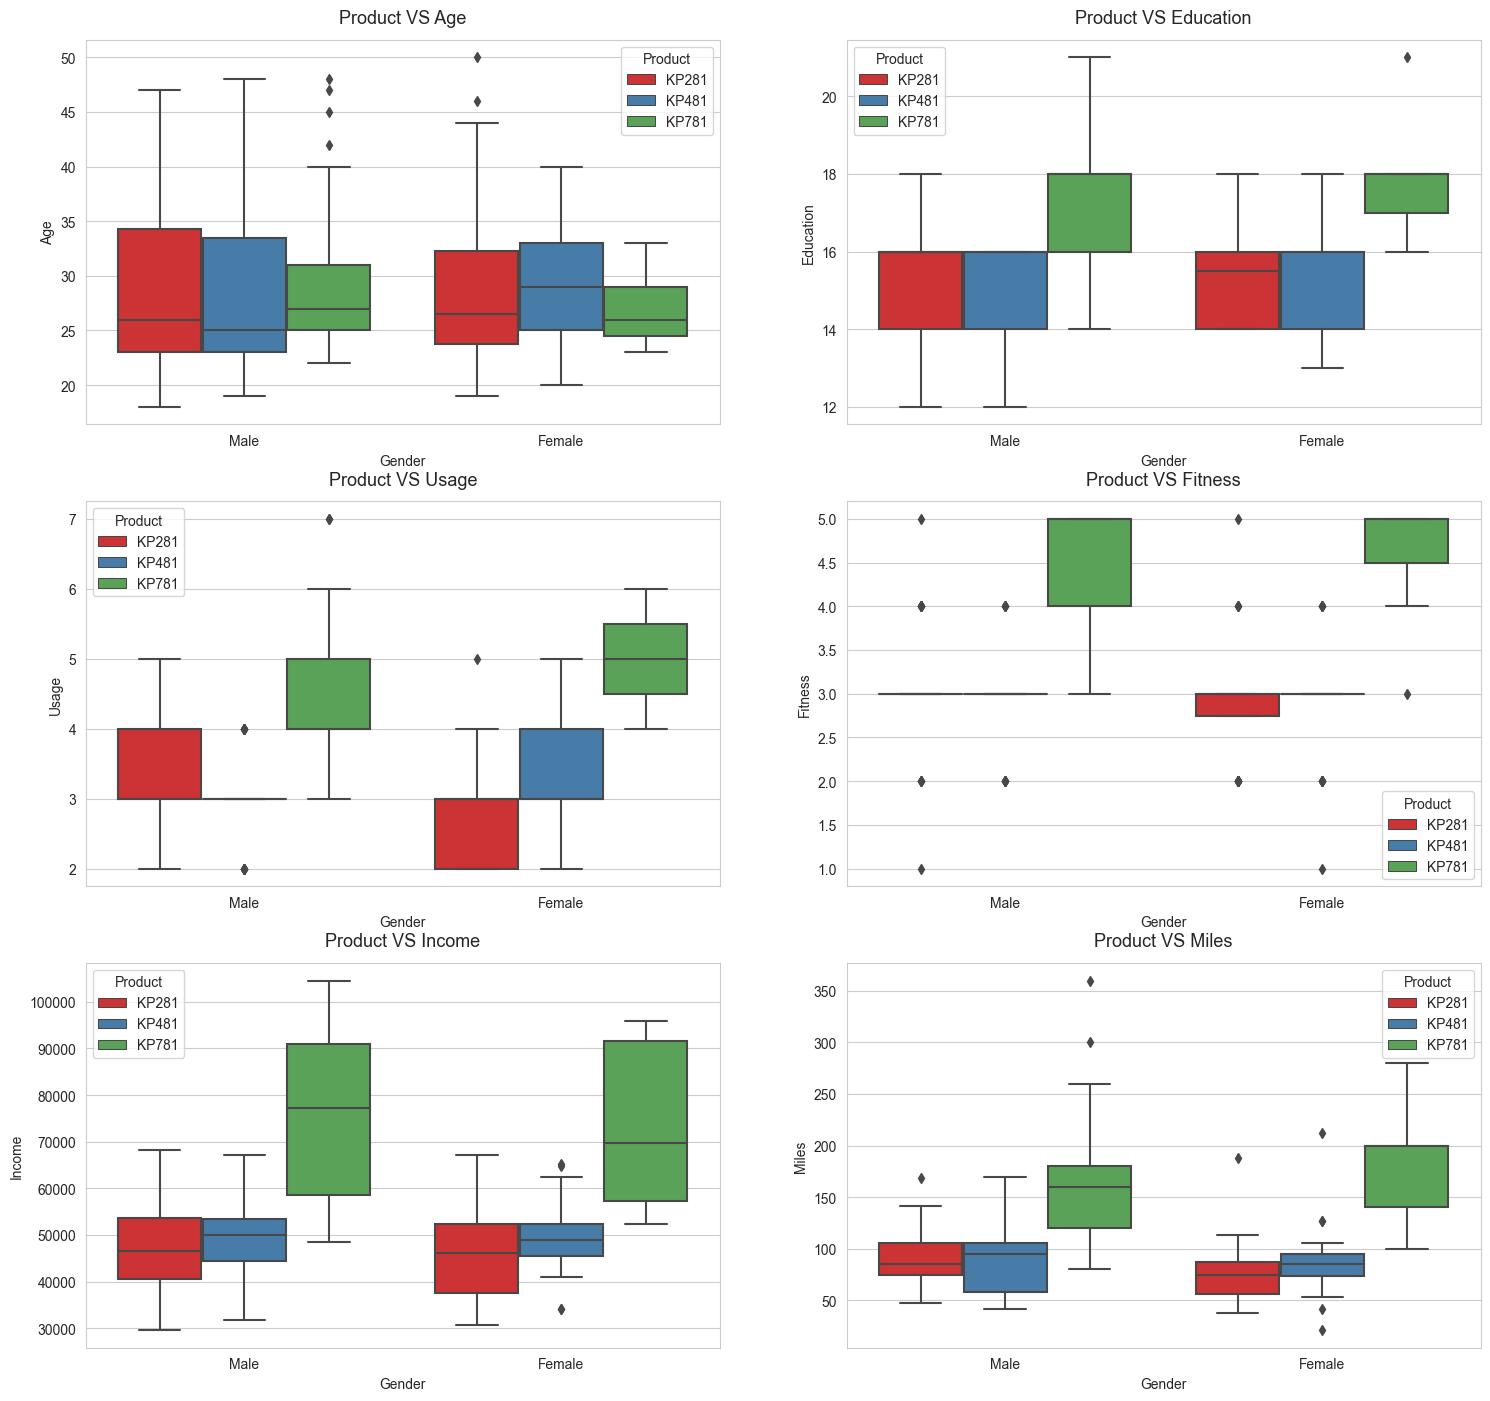

In [65]:
colmn=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig,axis=plt.subplots(nrows=3, ncols=2, figsize=(18,12))
fig.subplots_adjust(top=1.2)
count=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=colmn[count], hue='Product', ax=axis[i,j], palette='Set1')
        axis[i,j].set_title(f"Product VS {colmn[count]}", pad=12, fontsize=13)
        count += 1

# Marginal Joint , and Conditional Probability

#### Here we are looking at distribution of Male/Female customers who have purchased products like KP281, KP481, or KP781

In [69]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


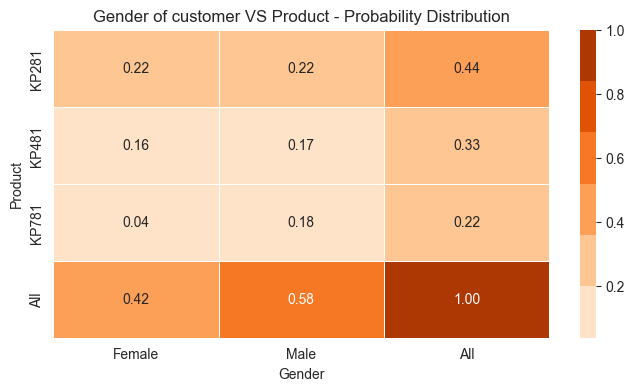

In [83]:
df_g = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, normalize=True)
colormap = sns.color_palette("Oranges")
plt.figure(figsize=(8,4))
plt.title('Gender of customer VS Product - Probability Distribution')
sns.heatmap(df_g, annot=True, fmt=".2f", linewidth=.5, cmap=colormap)
plt.show()

#### Here we are looking at the distribution of customers by Marital Status who have purchased products like KP281, KP481, or KP781

In [85]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


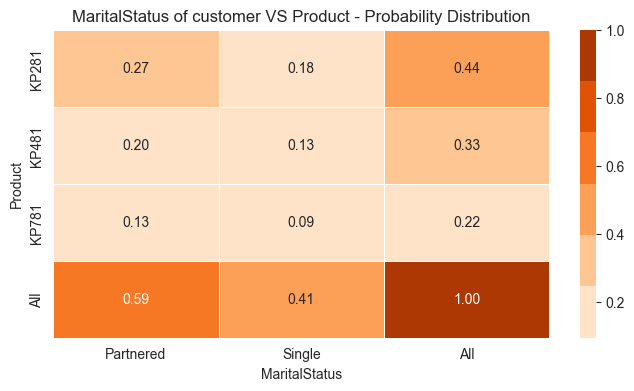

In [86]:
df_ms = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, normalize=True)
colormap = sns.color_palette("Oranges")
plt.figure(figsize=(8,4))
plt.title('MaritalStatus of customer VS Product - Probability Distribution')
sns.heatmap(df_ms, annot=True, fmt=".2f", linewidth=.5, cmap=colormap)
plt.show()

#### Here we are looking at the distribution of customers by Years of Education who have purchased products like KP281, KP481, or KP781

In [87]:
pd.crosstab(index=df['Product'], columns=df['Education'], margins=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


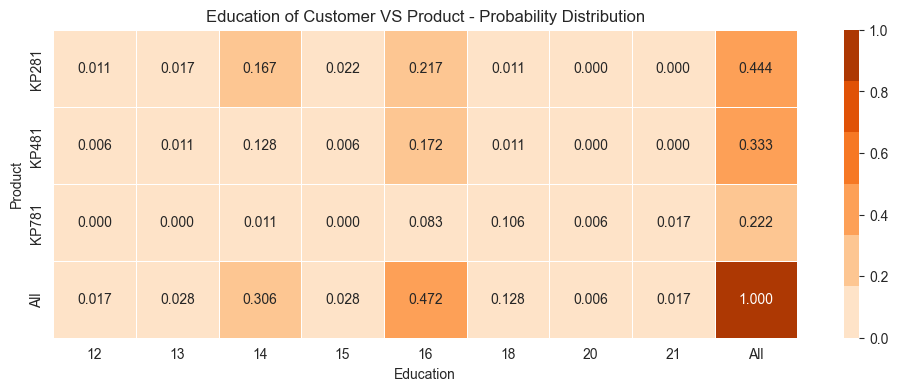

In [106]:
df_ed = pd.crosstab(index=df['Product'], columns=df['Education'], margins=True, normalize=True)
colormap = sns.color_palette('Oranges')
plt.figure(figsize=(12,4))
plt.title('Education of Customer VS Product - Probability Distribution')
sns.heatmap(df_ed, annot=True, fmt='.3f', linewidth=.5, cmap=colormap)
plt.show()

#### Here we are looking at the distribution of customers Weekly Usage who have purchased products like KP281, KP481, or KP781

In [96]:
pd.crosstab(index=df['Product'], columns=df['Usage'], margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


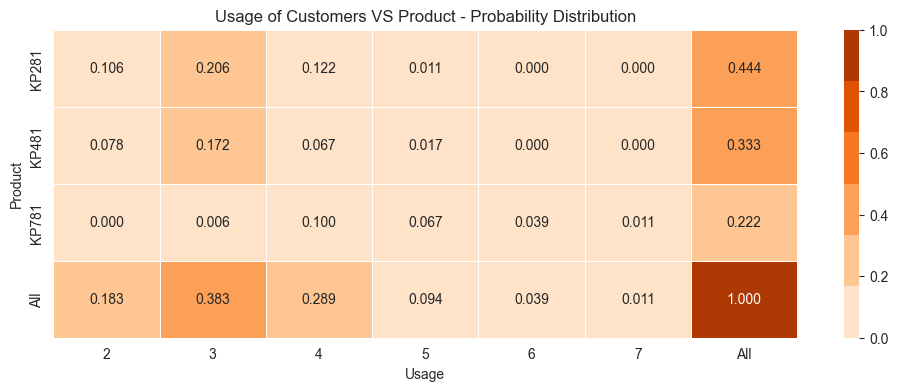

In [107]:
df_u = pd.crosstab(index=df['Product'], columns=df['Usage'], margins=True, normalize=True)
colormap = sns.color_palette('Oranges')
plt.figure(figsize=(12,4))
plt.title('Weekly Usage of Customers VS Product - Probability Distribution')
sns.heatmap(df_u, annot=True, fmt='.3f', linewidth=.5, cmap=colormap)
plt.show()

#### Here we are looking at the distribution of customers Fitness Level who have purchased products like KP281, KP481, or KP781

In [108]:
pd.crosstab(index=df['Product'], columns=df['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


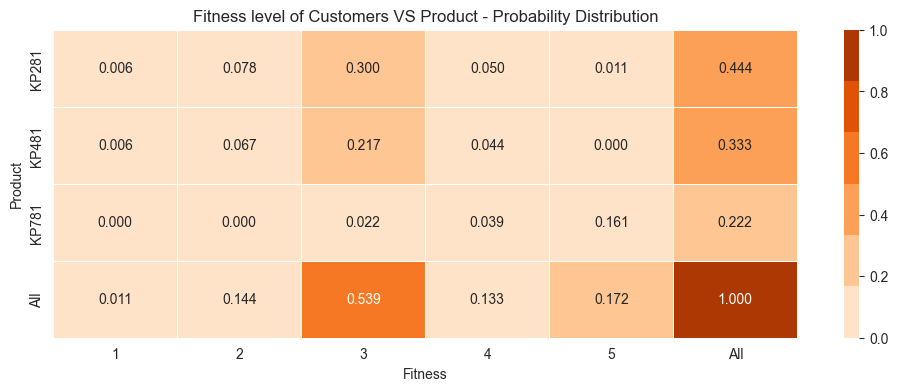

In [109]:
df_f = pd.crosstab(index=df['Product'], columns=df['Fitness'], margins=True, normalize=True)
colormap = sns.color_palette('Oranges')
plt.figure(figsize=(12,4))
plt.title('Fitness level of Customers VS Product - Probability Distribution')
sns.heatmap(df_f, annot=True, fmt='.3f', linewidth=.5, cmap=colormap)
plt.show()

# Customer Profiling

### Analysis of income brackets across different product categories

#### We have seen that average income for entire dataset is approx INR 53720. Lets analyse the following question

1)Given that a customers income is less than 53720. What is the probability that customer might purchase any product 

In [114]:
df[df['Income']<= 53720] ['Product'].value_counts(normalize=True)

Product
KP281    0.529915
KP481    0.401709
KP781    0.068376
Name: proportion, dtype: float64

2)Given that a customers income is greater than 53720. What is the probability that customer might purchase any product 

In [115]:
df[df['Income']>= 53720] ['Product'].value_counts(normalize=True)

Product
KP781    0.507937
KP281    0.285714
KP481    0.206349
Name: proportion, dtype: float64

### Analysis of 'Expected Miles to be Covered' Brackets Across Different Product Categories

#### We have seen that average expected mile to be covered in entire dataset is approx 103. Lets analyse following questions

1)Given that expected miles to covered by an customer is less than 103. What is the probability that customer might purchase any product.

In [5]:
df[df['Miles'] <= 103] ['Product'].value_counts(normalize=True)

Product
KP281    0.555556
KP481    0.376068
KP781    0.068376
Name: proportion, dtype: float64

2)Given that expected miles to be covered by an customer is more than 103. what is the probability that customer might purchase any product

In [6]:
df[df['Miles'] >= 103] ['Product'].value_counts(normalize=True)

Product
KP781    0.484848
KP281    0.272727
KP481    0.242424
Name: proportion, dtype: float64

# Conditional Probability

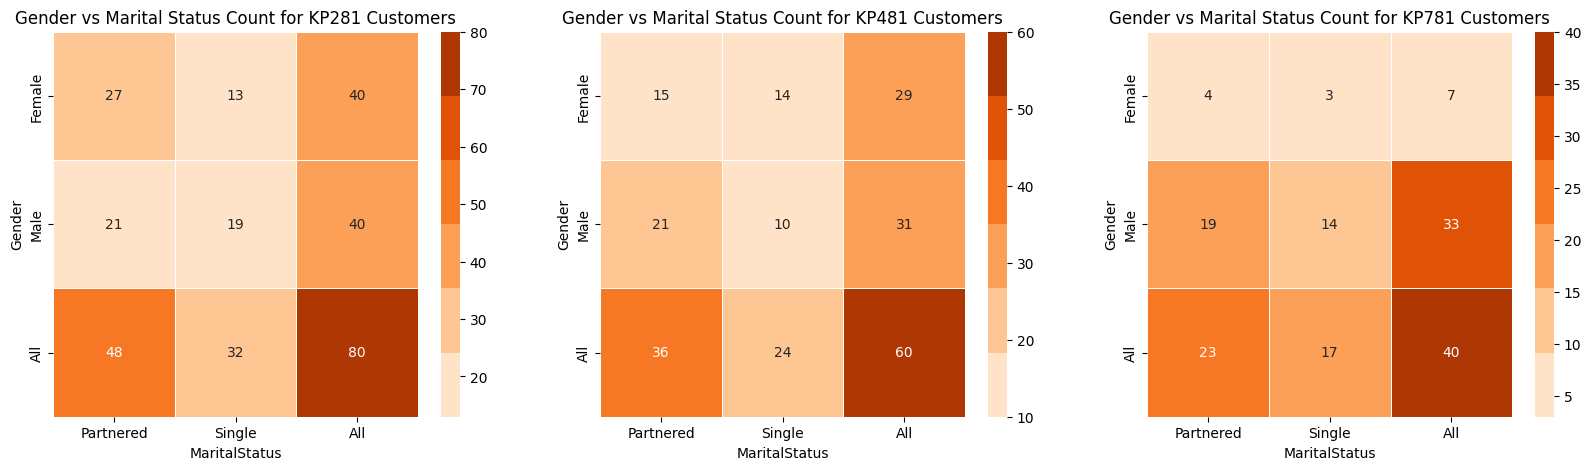

In [15]:
df1 = pd.crosstab(index=df[df['Product'] == 'KP281']["Gender"], \
                  columns=df[df['Product'] == 'KP281']["MaritalStatus"], margins=True)
df2 = pd.crosstab(index=df[df['Product'] == 'KP481']["Gender"], \
                  columns=df[df['Product'] == 'KP481']["MaritalStatus"], margins=True)
df3 = pd.crosstab(index=df[df['Product'] == 'KP781']["Gender"], \
                  columns=df[df['Product'] == 'KP781']["MaritalStatus"], margins=True)
colormap = sns.color_palette("Oranges")
fig,axes=plt.subplots(1,3,figsize=(20,5))
sns.heatmap(df1, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap, ax=axes[0])
axes[0].set_title('Gender vs Marital Status Count for KP281 Customers')
sns.heatmap(df2, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap, ax=axes[1])
axes[1].set_title('Gender vs Marital Status Count for KP481 Customers')
sns.heatmap(df3, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap, ax=axes[2])
axes[2].set_title('Gender vs Marital Status Count for KP781 Customers')
plt.show()

###### For Product KP281

- We see that conditional probability of customers being Female given that the Marital Status is 
Partnered is 0.5625 (27/48)
- We see that conditional probability of customers being Male given that the Marital Status is 
Partnered is 0.4375 (21/48)
- We see that conditional probability of customers being Female given that the Marital Status is 
Single is 0.40625 (13/32)
- We see that conditional probability of customers being Male given that the Marital Status is 
Single is 0.59375 (19/32)


For Product KP481

- We see that conditional probability of customers being Female given that the Marital Status is 
Partnered is 0.417 (15/36)
- We see that conditional probability of customers being Male given that the Marital Status is 
Partnered is 0.583 (21/36)
- We see that conditional probability of customers being Female given that the Marital Status is 
Single is 0.583 (14/24)
- We see that conditional probability of customers being Male given that the Marital Status is 
Single is 0.417 (10/24)


For Product KP781

- We see that conditional probability of customers being Female given that the Marital Status is 
Partnered is 0.174 (4/23)
- We see that conditional probability of customers being Male given that the Marital Status is 
Partnered is 0.826 (19/23)
- We see that conditional probability of customers being Female given that the Marital Status is 
Single is 0.176 (3/17)
- We see that conditional probability of customers being Male given that the Marital Status is 
Single is 0.824 (14/17)

# BUSINESS INSIGHTS

###### KP281 customer's profile
	1. Highest chances among other products.
	2. Usage under 4days per week.
	3. Fitness level mostly under 3.
	4. Less to medium earning customers.
	5. Females who Partnered most chance than Females who are single.
	6. Customers who educated under 16 years most preferable.
	7. Customers whose usage under 120 miles per week
    
###### KP481 customer's profile
	1. Second Popular Product.
	2. Usage under 4days per week.
	3. Fitness level mostly under 3.
	4. Less to medium earning customers.
	5. Male customers who partnered prefer more than Male customers who single.
	6. It has almost similar customer's profile like KP281, but KP281 is wide range of customers than KP481.
###### KP781 customer's profile
	1. Mostly preferred by Male customers.
	2. Usage more than 120 miles per week.
	3. Fitness level more than 3.
	4. Usage more than 4 days per week.
	5. Customers who educated more than 16 years.
	6. High salaried Customers.
 


#### Insights:
1. 57.78% Customers are Male.
2. 59.44% Customers are Partnered.
3. Most sold product KP281, its 44.44% of sales out of overall Aerofit Treadmill sale.
4. KP281, KP481 products have almost similar customer’s profile, except Male Partnered prefer KP481 & Female Partnered prefer KP281.
5. KP781 product is most preferred by Males, it’s almost 6 times compared to Females.
6. 75% of customers are earning less than 60k, and customers who earning more than 60k prefer KP781.
7. KP781 had unique among other treadmills when it comes more usage or high fitness customer.
8. Probability of Buying KP281 increased from 44.44% to 58.7%, if customer is Female and Partnered.
9. Probability of Buying KP781 increased from 22.22% to 32.56%, if customer is Male and Single.
10. Probability of Buying KP781 decreased from 22.22% to 8.7%, if customer is Female and Partnered.



# RECOMANDATION

#### - We should target male customer to buy Advance level treadmill  
#### - We should strongly recommend are products to married couples since they are our target audience 
#### - Customers who are less fit and who are average fit, we should recommend them entry level and midlevel treadmills.
#### - Advanced treadmill can be recommend to potential customers whose Fitness Level is more than or equal to 3.
#### - As KP781 premium product preferred by Males, more usage and high salaried people, we can promote this product with similar characteristics and also we can promote upcoming premium products to them.
#### - KP281 & KP481 products preferred by almost similar Characteristics and KP281 is most sold product, we can promote KP481    products more and can make some no cost EMI support.
#### - Provide personalized Ads in E-commerce sites and in Social Media for better reach to similar characteristics of people with respective preferred products. 
